### Homework 2 - Question 4 - Luke Arend

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
obj = scipy.io.loadmat('mt2files/PCA.mat')
M = obj['M']

### a)

Compute the principle components of the population response via the SVD of `M`. First, mean-center the data:

In [3]:
M -= np.mean(M, axis=0)

Next, compute eigenvectors of the covariance matrix $C = \tilde M^T \tilde M$. Let $M = U S V^T$. Then the eigenvalues of $C$ are the squared singular values of $\tilde M$ and its eigenvectors are the columns of $V$:

In [4]:
U, s, Vt = np.linalg.svd(M)

In [5]:
eigenvalues = s ** 2
eigenvectors = Vt

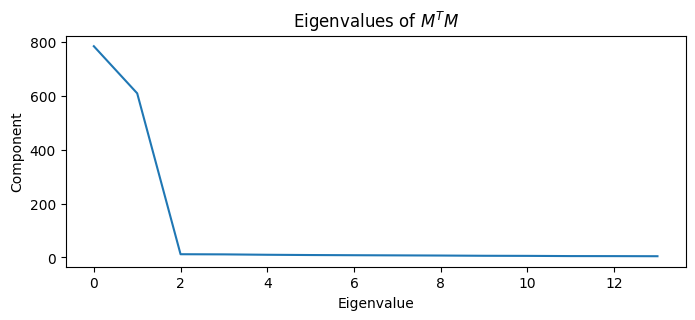

In [6]:
plt.subplots(figsize=(8, 3))
plt.plot(eigenvalues)
plt.title('Eigenvalues of $M^T M$')
plt.xlabel('Eigenvalue')
plt.ylabel('Component')
plt.show()

M has only two components with large eigenvalues. This suggests that the underlying dimensionality of the data is 2.

### b)

Now we project $\tilde M$ onto the first principle component and plot a histogram of the values.

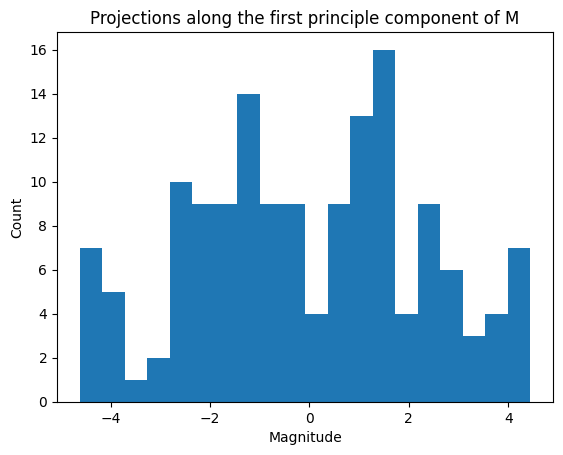

In [7]:
v1 = eigenvectors[0]
vals = M @ v1
plt.hist(vals, bins=20)
plt.title('Projections along the first principle component of M')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

The values are quite spread out. We can verify that the sum of their squared magnitude is the first eigenvalue of $C$.

In [8]:
eigenvalues[0]

784.4378048854699

In [9]:
np.sum(vals ** 2)

784.4378048854713

In [10]:
explained_variance = np.sum(vals ** 2)
total_variance = np.sum(M ** 2)
explained_variance / total_variance

0.5297683493388249

The first eigenvector accounts for 52.9% of the total variance in $M$.

### c)

Below we can plot the distribution projected onto the first two principle components.

(-5.081171038629532, 4.901658189780306, -4.576938316111025, 4.5400232817188675)

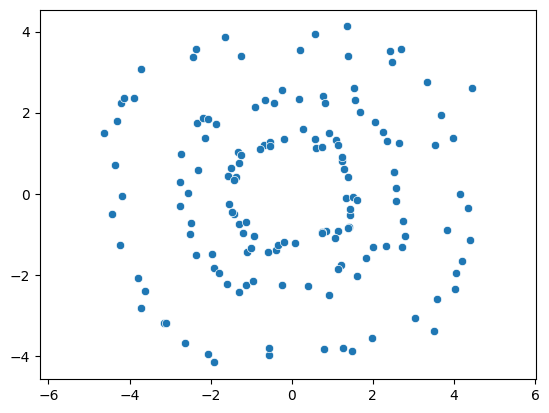

In [11]:
sns.scatterplot(x=M @ eigenvectors[0], y=M @ eigenvectors[1])
plt.axis('equal')

The squared lengths of these projected vectors is the sum of $\lambda_1$ and $\lambda_2$.

In [12]:
eigenvalues[0] + eigenvalues[1]

1393.8714772402632

In [13]:
Y = np.array([M @ eigenvectors[0], M @ eigenvectors[1]])
var = np.sum([np.sum(row ** 2) for row in Y])
var

1393.8714772402645

We can measure the total variance to see how much variance is explained by $\lambda_1$ and $\lambda_2$.

In [14]:
totalvar = np.sum([np.sum(row ** 2) for row in M @ eigenvectors])
totalvar

1480.718517564301

In [15]:
var / totalvar

0.9413480419851202

So the first two principle components explain 94.1% of the total variance.

### d)

We can project the data onto the first two principle components only and plot it. This reconstructs the data from a "compressed" form that explains 94.1% of the variance using two instead of 14 dimensions.

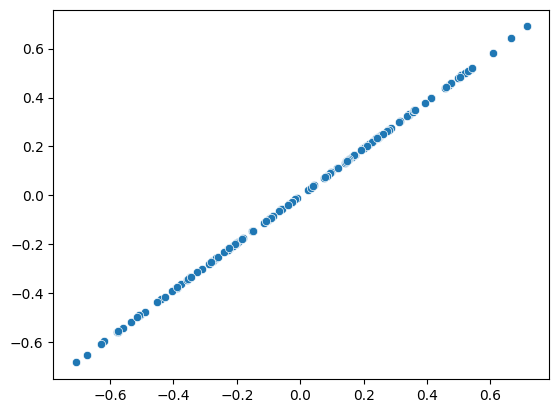

In [16]:
pcs = eigenvectors.copy()
pcs[2:, :] = 0
Y = M @ pcs
sns.scatterplot(x=Y[:, 0], y=Y[:, 1])
plt.show()